# Ejemplo Clasificación Binaria

Modelo de Redes Neuronales para clasificación binaria de peliculas (positivas o negativas) de un conjuto de datos de IMDB

In [1]:
from keras.datasets import imdb

In [14]:
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000)

In [16]:
word_index = imdb.get_word_index()
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join([reverse_word_index.get(i-3, '?') for i in train_data[0]])
print(decode_review)
print(train_labels[0])

? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you thi

In [17]:
import numpy as np

In [20]:
# Codificación
def vectorize_sequence(sequences, dimension=10000):
    res = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        res[i, sequence] = 1
    return res

In [21]:
x_train = vectorize_sequence(train_data)
x_test = vectorize_sequence(test_data)

In [23]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [45]:
from keras import models
from keras import layers

In [48]:
# Definición del modelo
model = models.Sequential()
model.add(layers.Dense(16, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [49]:
# Compilación del modelo
model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [51]:
# Conjunto de validación
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [53]:
# Entrenamiento del modelo
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 5s 105ms/step - loss: 0.5263 - accuracy: 0.7802 - val_loss: 0.3888 - val_accuracy: 0.8719
Epoch 2/20
30/30 [==============================] - 1s 28ms/step - loss: 0.3126 - accuracy: 0.9025 - val_loss: 0.3071 - val_accuracy: 0.8873
Epoch 3/20
30/30 [==============================] - 1s 26ms/step - loss: 0.2293 - accuracy: 0.9266 - val_loss: 0.2785 - val_accuracy: 0.8911
Epoch 4/20
30/30 [==============================] - 1s 25ms/step - loss: 0.1812 - accuracy: 0.9404 - val_loss: 0.2732 - val_accuracy: 0.8920
Epoch 5/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1463 - accuracy: 0.9536 - val_loss: 0.2797 - val_accuracy: 0.8896
Epoch 6/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1220 - accuracy: 0.9604 - val_loss: 0.2893 - val_accuracy: 0.8863
Epoch 7/20
30/30 [==============================] - 1s 23ms/step - loss: 0.1007 - accuracy: 0.9709 - val_loss: 0.3088 - val_accuracy: 0.8859
Epoch 8/20
3

In [54]:
import matplotlib.pyplot as plt

In [55]:
history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

In [56]:
epochs = range(1, len(loss_values) + 1)

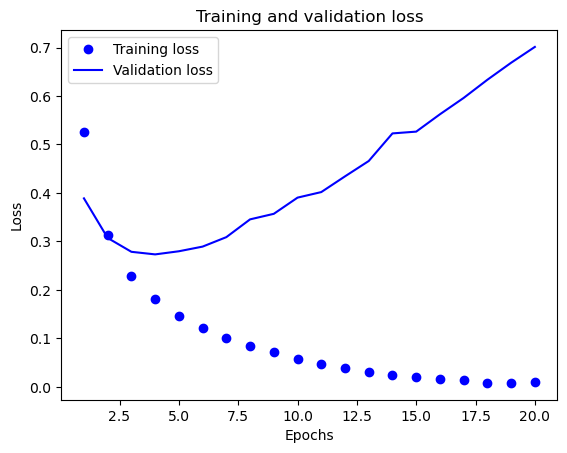

In [57]:
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

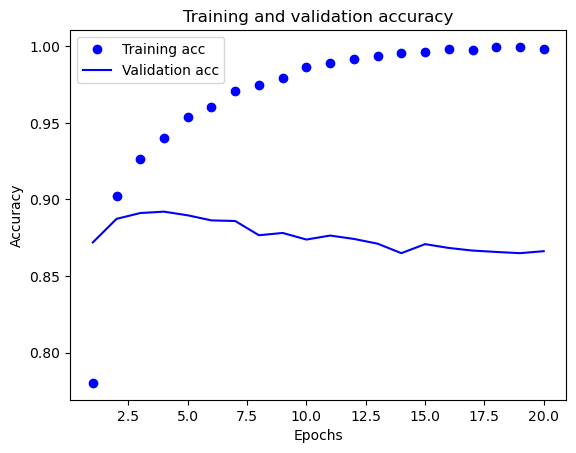

In [62]:
plt.clf()
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

Se observa que la perdida y exactitud encuentrar puntos óptimos en la 4ta retropropagación. Luego, se observa que comienza un sobreajuste. Por lo tanto, se re-entrena el modelo solo con 4 retropropagaciones. 

In [64]:
model.fit(x_train, y_train, epochs=4, batch_size=512)

Epoch 1/4
49/49 [==============================] - 1s 16ms/step - loss: 0.2439 - accuracy: 0.9460
Epoch 2/4
49/49 [==============================] - 1s 16ms/step - loss: 0.1414 - accuracy: 0.9597
Epoch 3/4
49/49 [==============================] - 1s 19ms/step - loss: 0.1113 - accuracy: 0.9668
Epoch 4/4
49/49 [==============================] - 1s 17ms/step - loss: 0.0911 - accuracy: 0.9735


In [65]:
res = model.evaluate(x_test, y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.5031 - accuracy: 0.8570


In [66]:
res

[0.5031263828277588, 0.8569999933242798]

In [68]:
# Se generan predicciones
model.predict(x_test)

782/782 [==============================] - 3s 3ms/step


array([[0.00540116],
       [0.99994415],
       [0.86779475],
       ...,
       [0.09820241],
       [0.03175642],
       [0.8201214 ]], dtype=float32)

In [75]:
probs = model.predict(x_test)
probs

782/782 [==============================] - 3s 3ms/step


array([[0.00540116],
       [0.99994415],
       [0.86779475],
       ...,
       [0.09820241],
       [0.03175642],
       [0.8201214 ]], dtype=float32)

In [76]:
np.argmax(probs, axis=1)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)